In [1]:
#for image processing
import cv2

#to open the filebox
import easygui

#to store image
import numpy as np

#to read image stored at particular path
import imageio

In [2]:
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [3]:
# Make main window

top=tk.Tk()
top.geometry('400x400')
top.title('Cartoony your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

In [4]:
""" fileopenbox opens the box to choose file and help us store file path as string """
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [5]:
# Read the image
def cartoonify(ImagePath):
    # read the image
    originalimage = cv2.imread(ImagePath)
    originalimage = cv2.cvtColor(originalimage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers
    
    # confirm that image is chosen
    if originalimage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalimage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')
    
    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalimage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')
    
    #retrieving the edges for cartoon effect by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')
    
    #applying bilateral filter to remove noise and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalimage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')
    
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')
    
    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        
    # Make save button in main window
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()

In [6]:
# Function for saving button
    
def save(ReSized6, ImagePath):
    
    #saving an image using imwrite()
    newName="cartoon_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

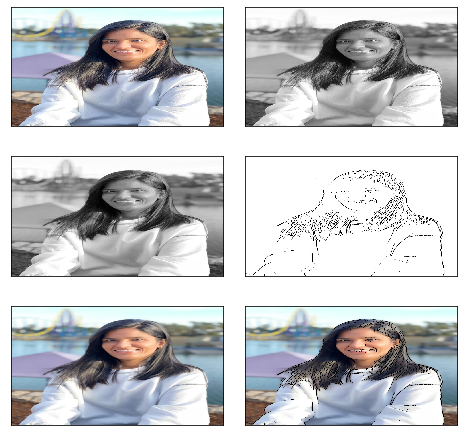

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\kisha\Miniconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-5-1c2c6af9c40a>", line 52, in <lambda>
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
  File "<ipython-input-6-42a99233dbf6>", line 12, in save
    tk.messagebox.showinfo(title=None, message=I)
AttributeError: module 'tkinter' has no attribute 'messagebox'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\kisha\Miniconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-5-1c2c6af9c40a>", line 52, in <lambda>
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
  File "<ipython-input-6-42a99233dbf6>", line 12, in save
    tk.messagebox.showinfo(title=None, message=I)
AttributeError: module 'tkinter' ha

In [ ]:
# Make cartoonify button in the main window

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

# Main function to build the tkinter window

top.mainloop()